<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes):
        # Set up Architecture of Neural Network
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        self.weights1 = np.random.rand(self.input_nodes, self.hidden_nodes)
        self.weights2 = np.random.rand(self.hidden_nodes, self.output_nodes)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return x * (1 - x)
    
    def feed_forward(self, X):
        self.hidden_sum = np.dot(X, self.weights1)
        self.hidden_activated = self.sigmoid(self.hidden_sum)

        self.output_sum = np.dot(self.hidden_activated, self.weights2)
        self.output_activated = self.sigmoid(self.output_sum)
        
        return self.output_activated
        
    def backward(self, X, y, output):
        self.out_error = y - output
        self.out_delta = self.out_error * self.sigmoid_prime(output)
        
        self.hidden_error = np.dot(self.out_delta, self.weights2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_prime(self.hidden_activated)
        
        self.weights1 += np.dot(X.T, self.hidden_delta)
        self.weights2 += np.dot(self.hidden_activated.T, self.out_delta)

    def train(self, X, y):
        out = self.feed_forward(X)
        self.backward(X, y, out)

    def loss(self, X, y):
        return np.mean(np.square(y - self.feed_forward(X)))

================[ EPOCH 1000 ]================
Input:
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output:
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output:
[[0.01890926]
 [0.93784483]
 [0.94487892]
 [0.96310725]
 [0.96433503]
 [0.06444645]
 [0.08086715]]
Loss: 
 0.002940723552583


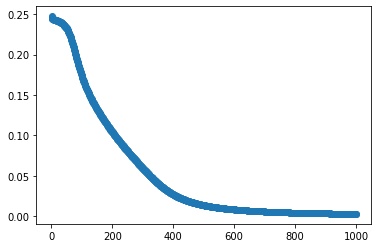

In [29]:
network = NeuralNetwork(3, 4, 1)
X = np.array([[0, 0, 1],
[0, 1, 1],
[1, 0, 1],
[0, 1, 0],
[1, 0, 0],
[1, 1, 1],
[0, 0, 0]])
y = np.array([[0], [1], [1],[ 1], [1], [0], [0]])

losses = []

for i in range(1000):
    network.train(X,y)
    losses.append(network.loss(X, y))

print("="*16 + f"[ EPOCH {i+1} ]" + "="*16)
print("Input:", np.array2string(X), sep="\n")
print("Actual Output:", np.array2string(y), sep="\n")
print("Predicted Output:", np.array2string(network.feed_forward(X)), sep="\n")
print("Loss: \n", network.loss(X, y))

plt.plot(range(1, len(losses) + 1), losses, marker="o");

## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [8]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [0]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [10]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

In [31]:
import pandas as pd

sample_index = np.random.randint(x_train.shape[0], size=5000)

X_sample = x_train[sample_index]
y_sample = np.array(pd.DataFrame(data=y_train[sample_index]))
y_sample

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]])

### Estimating Your `net

In [0]:
class NeuralNetwork2:
    def __init__(self, input_nodes=784, hidden_nodes=32, output_nodes=1):
        # Set up Architecture of Neural Network
        self.input_nodes = input_nodes
        self.hidden1_nodes = hidden_nodes
        self.hidden2_nodes = hidden_nodes
        self.output_nodes = output_nodes

        self.weights1 = np.random.rand(self.input_nodes, self.hidden1_nodes)
        self.weights2 = np.random.rand(self.hidden1_nodes, self.hidden2_nodes)
        self.weights3 = np.random.rand(self.hidden2_nodes, self.output_nodes)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return x * (1 - x)
    
    def feed_forward(self, X):
        self.hidden1_sum = np.dot(X, self.weights1)
        self.hidden1_activated = self.sigmoid(self.hidden1_sum)

        self.hidden2_sum = np.dot(self.hidden1_activated, self.weights2)
        self.hidden2_activated = self.sigmoid(self.hidden2_sum)

        self.output_sum = np.dot(self.hidden2_activated, self.weights3)
        self.output_activated = self.sigmoid(self.output_sum)
        
    def backward(self, X, y):
        self.out_error = y - self.output_activated
        self.out_delta = self.out_error * self.sigmoid_prime(self.output_activated)
        
        self.hidden2_error = np.dot(self.out_delta, self.weights3.T)
        self.hidden2_delta = self.hidden2_error * self.sigmoid_prime(self.hidden2_activated)

        self.hidden1_error = np.dot(self.hidden2_delta, self.weights2.T)
        self.hidden1_delta = self.hidden1_error * self.sigmoid_prime(self.hidden1_activated)
        
        self.weights1 += np.dot(X.T, self.hidden1_delta)
        self.weights2 += np.dot(self.hidden1_activated.T, self.hidden2_delta)
        self.weights3 += np.dot(self.hidden2_activated.T, self.out_delta)

    def train(self, X, y):
        self.feed_forward(X)
        self.backward(X, y)

    def loss(self, X, y):
        self.feed_forward(X)
        return np.mean(np.square(y - self.output_activated))

================[ EPOCH 100 ]================
Input:
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [0 1 0]
 [1 0 0]
 [1 1 1]
 [0 0 0]]
Actual Output:
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]
Predicted Output:
[[0.99999998]
 [0.99999998]
 [0.99999998]
 ...
 [0.99999998]
 [0.99999998]
 [0.99999998]]
Loss: 
 0.9031999619916372
Weights: 
 [[0.42521573 0.64151572 0.44010847 ... 0.45452647 0.89269294 0.96371713]
 [0.25981781 0.15829854 0.75720897 ... 0.94025541 0.3634275  0.53752323]
 [0.56591759 0.90289046 0.79924982 ... 0.65431636 0.94998239 0.43183084]
 ...
 [0.81286978 0.88468882 0.03537155 ... 0.57645084 0.4011842  0.64217293]
 [0.98607503 0.52141208 0.06526268 ... 0.5382251  0.08201568 0.47111267]
 [0.77845993 0.99826813 0.52855291 ... 0.15642456 0.64027452 0.48938041]]


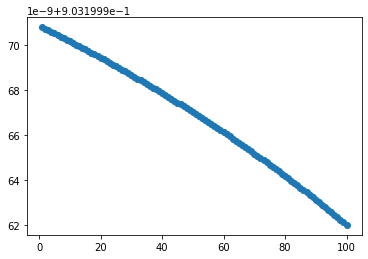

In [35]:
##### Your Code Here #####

network2 = NeuralNetwork2()

losses = []

for i in range(100):
    network2.train(X_sample, y_sample)
    losses.append(network2.loss(X_sample, y_sample))

print("="*16 + f"[ EPOCH {i+1} ]" + "="*16)
print("Input:", np.array2string(X), sep="\n")
print("Actual Output:", np.array2string(y), sep="\n")
print("Predicted Output:", np.array2string(network2.output_activated), sep="\n")
print("Loss: \n", network2.loss(X_sample, y_sample))
print("Weights: \n", network2.weights2)

plt.plot(range(1, len(losses) + 1), losses, marker="o");


## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?